# **05. Cat Dog Image Classifier using CNN and Transfer Learning**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



# Library Imports

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers, metrics, losses
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad,Adamax,Nadam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.utils import image_dataset_from_directory, plot_model, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset Import

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d moazeldsokyx/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats
License(s): CC0-1.0
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_dataset = image_dataset_from_directory(directory=r'/content/dataset/train',
                                             labels = 'inferred',label_mode = 'int',
                                             batch_size = 32,image_size = (256,256))

Found 20000 files belonging to 2 classes.


In [6]:
val_dataset = image_dataset_from_directory(directory=r'/content/dataset/validation',
                                             labels = 'inferred',label_mode = 'int',
                                             batch_size = 32,image_size = (256,256))

Found 5000 files belonging to 2 classes.


## Normalizing Data

In [7]:
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

In [8]:
train_dataset = train_dataset.map(process)
val_datset = val_dataset.map(process)

# Model-1

In [9]:
model1 = Sequential()

model1.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='valid',activation = 'relu',input_shape = (256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model1.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='valid',strides = (1,1),activation = 'relu',
                  input_dim = (256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model1.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='valid',strides = (1,1),activation = 'relu',
                  input_dim = (256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model1.add(Flatten())

model1.add(Dense(units = 128, activation='relu'))
model1.add(Dense(units = 64, activation='relu'))
model1.add(Dense(units = 1, activation='sigmoid'))

In [10]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,714,241 (14.17 MB)

 Trainable params: 3,714,241 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model1.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
call_back = EarlyStopping(monitor = 'val_accuracy',min_delta = 0.01, patience = 2,mode = 'max', restore_best_weights=True)

In [13]:
history1 = model1.fit(train_dataset,batch_size = 32,epochs = 100,verbose=1,callbacks = call_back,validation_data = val_dataset)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.5939 - loss: 0.6549 - val_accuracy: 0.6138 - val_loss: 121.9861
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7581 - loss: 0.4922 - val_accuracy: 0.7060 - val_loss: 94.7645
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8202 - loss: 0.3895 - val_accuracy: 0.7526 - val_loss: 78.0876
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.8766 - loss: 0.2832 - val_accuracy: 0.7014 - val_loss: 176.2329
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9297 - loss: 0.1722 - val_accuracy: 0.7100 - val_loss: 235.9142


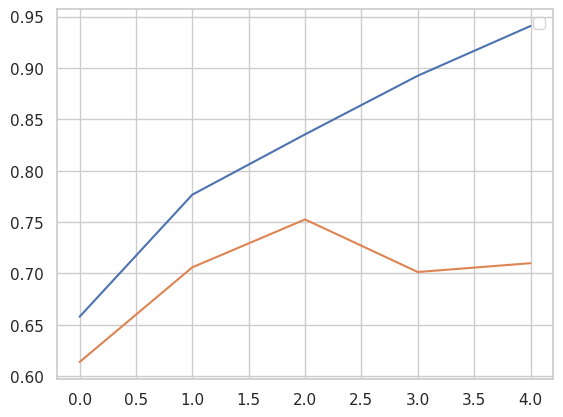

In [22]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend()
plt.show()

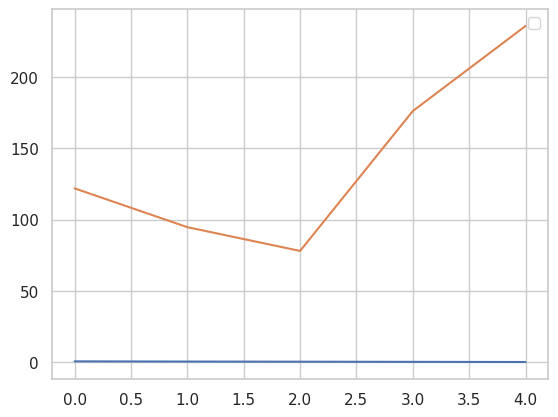

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend()
plt.show()

# Model-2


1.   Padding
2.   Batch Normalization
3.   Dropouts



In [16]:
model2 = Sequential()

model2.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='same',activation = 'relu',input_shape = (256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model2.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='same',strides = (1,1),activation = 'relu',
                  input_dim = (256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model2.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='same',strides = (1,1),activation = 'relu',
                  input_dim = (256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model2.add(Flatten())

model2.add(Dense(units = 128, activation='relu',kernel_initializer= 'he_normal'))
model2.add(Dropout(0.1))
model2.add(Dense(units = 64, activation='relu',kernel_initializer= 'he_normal'))
model2.add(Dropout(0.1))
model2.add(Dense(units = 1, activation='sigmoid',kernel_initializer= 'glorot_normal'))

In [17]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,222,529 (16.11 MB)

 Trainable params: 4,222,337 (16.11 MB)

 Non-trainable params: 192 (768.00 B)

In [18]:
call_back = EarlyStopping(monitor = 'val_accuracy',min_delta = 0.01, patience = 2,mode = 'auto', restore_best_weights=True)

In [19]:
history2 = model1.fit(train_dataset,batch_size = 32,epochs = 100,verbose=1,callbacks = call_back,validation_data = val_dataset)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8825 - loss: 0.2738 - val_accuracy: 0.7074 - val_loss: 191.7900
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 65ms/step - accuracy: 0.9238 - loss: 0.1898 - val_accuracy: 0.7316 - val_loss: 256.5466
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9564 - loss: 0.1184 - val_accuracy: 0.7400 - val_loss: 301.9343
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 87ms/step - accuracy: 0.9716 - loss: 0.0851 - val_accuracy: 0.7218 - val_loss: 317.2490


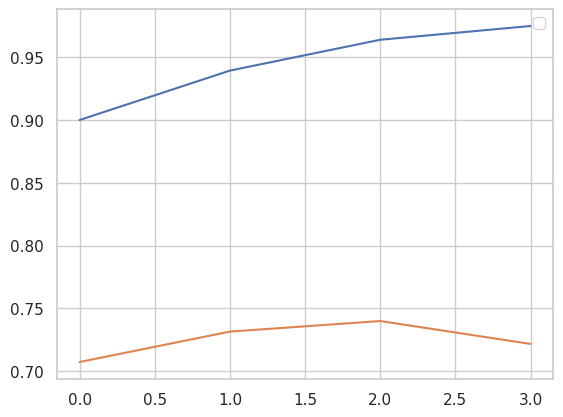

In [23]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend()
plt.show()

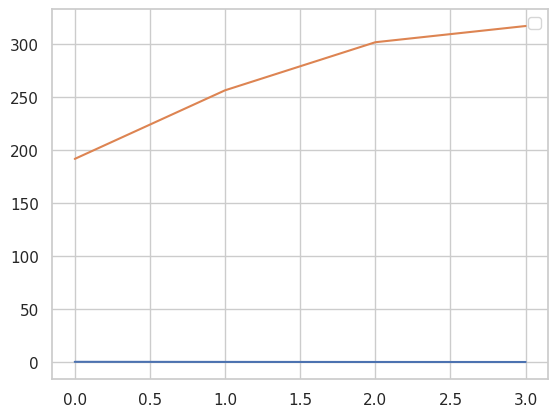

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend()
plt.show()